In [149]:
#import libraries
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.patches as mpatches
style.use('ggplot')
import scipy.stats as stats

In [150]:
# initialize list of years to process
yrs_to_process=[1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,
                 2014,2015,2016,2017]

#list to hold marvel monthly count for a year
# marvel_mntly_top_thirty = []
#list to hold DC monthly count for a year
# dc_mntly_top_ten = []

#attributes /column names needed to plot charts
publishers_attributes = ["Marvel_Top_Thirty","DC_Top_Thirty",'Others_Top_Thirty','Marvel_Total_Sold',
                         'DC_Total_Sold','Total_Sold','Total_Sales','Marvel_Total_Sales','DC_Total_Sales',
                         ]

#create publishers stats dataframe with years as the index and attributes as columns
publishers_stats_df = pd.DataFrame(index=yrs_to_process ,columns=publishers_attributes)
# df_publishers_total_sold = pd.DataFrame(index=yrs_to_process ,columns="Marvel","DC",'Others')
#initialize all columns to zero
publishers_stats_df = publishers_stats_df.fillna(value=0)



# through all years initialized in dataframe
for index,row in publishers_stats_df.iterrows():
    #list to hold marvel monthly count for a year
    #reset marvel and DC monthly top 10 stats list when processing every year
    marvel_mntly_top_thirty = []
    dc_mntly_top_thirty = []

    
    #process each monthly json file for the year being processed
    for comichron_json in glob.glob("./source-data/" + str(index) + "-*.json"):
        if os.path.isfile(comichron_json):
            print(f"Processing file {comichron_json}")
            #read json file
            monthly_df = pd.read_json(comichron_json)
            
            monthly_df["Year"] = index
            monthly_df["fileName"] = comichron_json
            
            #sum monthly count of comic books sold and add it to running total in publishers stats dataframe
            row['Total_Sold'] = row['Total_Sold'] + monthly_df["count"].sum()
            #sum monthly count of comic books for Marvel sold and add it to running total in publishers stats dataframe
            row['Marvel_Total_Sold'] += monthly_df[monthly_df["publisher"] == 'Marvel']["count"].sum()
            #sum monthly count of comic books for DC sold and add it to running total in publishers stats dataframe
            row['DC_Total_Sold'] += monthly_df[monthly_df["publisher"] == 'DC']["count"].sum()
            
            #sort and get top thirty comics sold
            monthly_top_30 = monthly_df.sort_values(by = "count" ,ascending=False ).head(30)
            #count how many times marvel occur in top 30
            marvel_mntly_top_thirty.append(len(monthly_top_30[monthly_top_30["publisher"] == 'Marvel']))
            #count how many times DC occur in top 30
            dc_mntly_top_thirty.append(len(monthly_top_30[monthly_top_30["publisher"] == 'DC']))
            

            monthly_df["fprice"] = monthly_df["price"].str.replace("$","")
            monthly_df["fprice"] = pd.to_numeric(monthly_df["fprice"])
            monthly_df["fcount"] = monthly_df["count"].astype(float)
            monthly_df["sales"] = monthly_df.fprice * monthly_df.fcount 
            row['Total_Sales'] += monthly_df["sales"].sum()
            row['Marvel_Total_Sales'] += monthly_df[monthly_df["publisher"] == 'Marvel']["sales"].sum()
            row['DC_Total_Sales'] += monthly_df[monthly_df["publisher"] == 'DC']["sales"].sum()
            
            
    
    #calculate average for the year
    row["Marvel_Top_Thirty"] = np.mean(marvel_mntly_top_thirty)
    row["DC_Top_Thirty"] = np.mean(dc_mntly_top_thirty)
    row["Others_Top_Thirty"] = 30 - (row["Marvel_Top_Thirty"] + row["DC_Top_Thirty"])



Processing file ./source-data/1997-03.json
Processing file ./source-data/1997-02.json
Processing file ./source-data/1997-05.json
Processing file ./source-data/1997-09.json
Processing file ./source-data/1997-08.json
Processing file ./source-data/1997-12.json
Processing file ./source-data/1997-04.json
Processing file ./source-data/1997-11.json
Processing file ./source-data/1997-07.json
Processing file ./source-data/1997-06.json
Processing file ./source-data/1997-10.json
Processing file ./source-data/1997-01.json
Processing file ./source-data/1998-06.json
Processing file ./source-data/1998-10.json
Processing file ./source-data/1998-11.json
Processing file ./source-data/1998-07.json
Processing file ./source-data/1998-01.json
Processing file ./source-data/1998-02.json
Processing file ./source-data/1998-03.json
Processing file ./source-data/1998-12.json
Processing file ./source-data/1998-04.json
Processing file ./source-data/1998-08.json
Processing file ./source-data/1998-09.json
Processing 

Processing file ./source-data/2014-06.json
Processing file ./source-data/2014-07.json
Processing file ./source-data/2014-11.json
Processing file ./source-data/2014-01.json
Processing file ./source-data/2014-02.json
Processing file ./source-data/2014-03.json
Processing file ./source-data/2014-08.json
Processing file ./source-data/2014-04.json
Processing file ./source-data/2014-12.json
Processing file ./source-data/2014-05.json
Processing file ./source-data/2014-09.json
Processing file ./source-data/2015-07.json
Processing file ./source-data/2015-11.json
Processing file ./source-data/2015-10.json
Processing file ./source-data/2015-06.json
Processing file ./source-data/2015-01.json
Processing file ./source-data/2015-03.json
Processing file ./source-data/2015-02.json
Processing file ./source-data/2015-09.json
Processing file ./source-data/2015-05.json
Processing file ./source-data/2015-04.json
Processing file ./source-data/2015-12.json
Processing file ./source-data/2015-08.json
Processing 

In [151]:
publishers_stats_df

,Marvel_Top_Thirty,DC_Top_Thirty,Others_Top_Thirty,Marvel_Total_Sold,DC_Total_Sold,Total_Sold,Total_Sales,Marvel_Total_Sales,DC_Total_Sales
1997,18,4,8,34985441,28097651,96154708,229329512,74709478,64723002
1998,18,4,8,28811621,24753072,81370613,198444858,64461676,58609535
1999,19,6,5,25793551,25802128,73533305,185049235,59255912,64727603
2000,19,6,5,22457597,23905108,66331411,178946963,56938441,63869228
2001,20,6,4,26143410,21102509,64312599,175166833,68032349,55841614
2002,20,6,4,31473401,20685102,70837161,188538204,77901647,54980266
2003,21,5,4,31323386,22750790,71139392,199084083,83769334,61866289
2004,21,8,1,35234972,25379713,72733899,206431384,96726853,70664594
2005,19,10,1,34821847,28910833,74008729,213112603,99492687,79953045
2006,17,12,1,36328753,32188030,78872675,239952390,110715874,95271994


In [152]:
#name index to year ,reset index and display calculated stats
dfs = np.split(publishers_stats_df, [3], axis=1)
top_30_publishers_stats_df = dfs[0]
top_30_publishers_stats_df = top_30_publishers_stats_df.reset_index()
top_30_publishers_stats_df = top_30_publishers_stats_df.rename(columns={'index': 'Year', 
                                                                        'Marvel_Top_Thirty': 'Marvel',
                                                                        'DC_Top_Thirty': 'DC',
                                                                        'Others_Top_Thirty': 'Others'  })
total_sold_publishers_stats_df = dfs[1]
total_sold_publishers_stats_df = total_sold_publishers_stats_df.reset_index()
total_sold_publishers_stats_df = total_sold_publishers_stats_df.rename(columns={'index': 'Year', 
                                                                        'Marvel_Total_Sold': 'Marvel',
                                                                        'DC_Total_Sold': 'DC',
                                                                        'Total_Sold': 'Total'  })



In [153]:
top_30_publishers_stats_df


,Year,Marvel,DC,Others
0,1997,18,4,8
1,1998,18,4,8
2,1999,19,6,5
3,2000,19,6,5
4,2001,20,6,4
5,2002,20,6,4
6,2003,21,5,4
7,2004,21,8,1
8,2005,19,10,1
9,2006,17,12,1


In [154]:
total_sold_publishers_stats_df

,Year,Marvel,DC,Total,Total_Sales,Marvel_Total_Sales,DC_Total_Sales
0,1997,34985441,28097651,96154708,229329512,74709478,64723002
1,1998,28811621,24753072,81370613,198444858,64461676,58609535
2,1999,25793551,25802128,73533305,185049235,59255912,64727603
3,2000,22457597,23905108,66331411,178946963,56938441,63869228
4,2001,26143410,21102509,64312599,175166833,68032349,55841614
5,2002,31473401,20685102,70837161,188538204,77901647,54980266
6,2003,31323386,22750790,71139392,199084083,83769334,61866289
7,2004,35234972,25379713,72733899,206431384,96726853,70664594
8,2005,34821847,28910833,74008729,213112603,99492687,79953045
9,2006,36328753,32188030,78872675,239952390,110715874,95271994


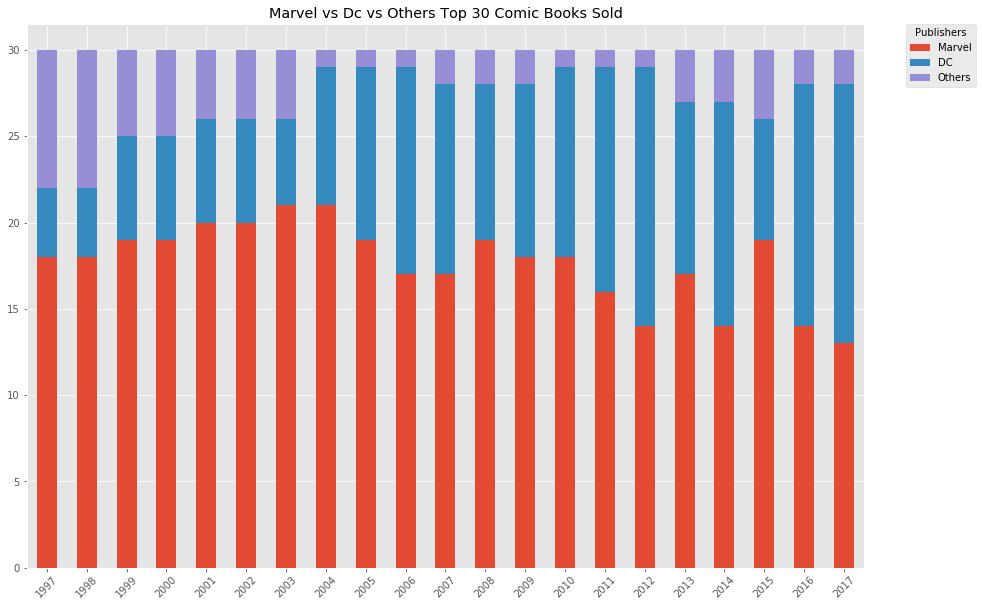

In [155]:
ax = top_30_publishers_stats_df[["Marvel","DC","Others"]]\
                        .plot(kind='bar',figsize=(15, 10),stacked = True,\
                         title="Marvel vs Dc vs Others Top 30 Comic Books Sold")
ax.set_xticklabels(yrs_to_process,rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Publishers")
plt.show()

In [156]:
stats.ttest_ind(publishers_stats_df["Marvel_Top_Thirty"], publishers_stats_df["DC_Top_Thirty"], equal_var=False)

Ttest_indResult(statistic=9.0155700765273661, pvalue=1.3700536804185998e-10)

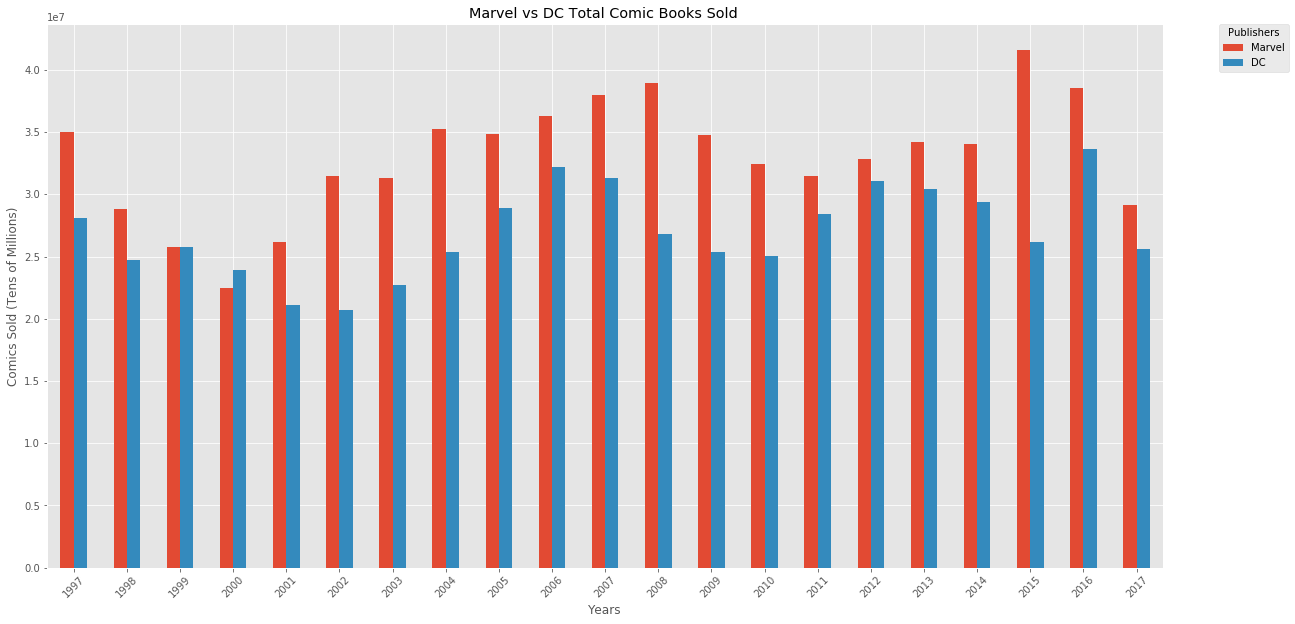

In [157]:

ax = total_sold_publishers_stats_df[["Marvel","DC"]].plot(kind='bar',figsize=(20, 10))
ax.set_xticklabels(yrs_to_process,rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Publishers")
# Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.title("Marvel vs DC Total Comic Books Sold ")
plt.xlabel("Years")
plt.ylabel("Comics Sold (Tens of Millions)")
plt.show()




In [158]:
stats.ttest_ind(publishers_stats_df["Marvel_Total_Sold"], publishers_stats_df["DC_Total_Sold"], equal_var=False)

Ttest_indResult(statistic=4.6743693628194878, pvalue=3.8089504319423178e-05)

In [159]:
# Labels for the sections of our pie chart
labels = ["Marvel", "DC", "Others"]

# The values of each section of the pie chart
sizes = []
sizes.append(publishers_stats_df["Marvel_Total_Sales"].sum())
sizes.append(publishers_stats_df["DC_Total_Sales"].sum())
sizes.append(publishers_stats_df["Total_Sales"].sum() - (sizes[0] + sizes[1]))

# The colors of each section of the pie chart
# colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

explode = (0.1, 0, 0)
sizes

[2240988994, 1727904061, 1178769583]

In [160]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1a1809d5c0>,
  <matplotlib.text.Text at 0x1a17e8ebe0>])

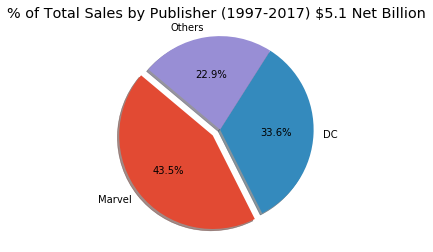

In [161]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("% of Total Sales by Publisher (1997-2017) $"
          + str(round(publishers_stats_df["Total_Sales"].sum()/1000000000,1)) + " Net Billion")
plt.show()

In [162]:
stats.ttest_ind(publishers_stats_df["Marvel_Total_Sales"], publishers_stats_df["DC_Total_Sales"], equal_var=False)

Ttest_indResult(statistic=2.9891402332787536, pvalue=0.0053457091362785931)